## Resolução da equação do calor

O presente notebook tem como objetivo resolver a equação do calor, que é definido como sendo um modelo matemático que represente a difusão do calor em sólidos. Essa equação é uma equação diferencial parcial (EDP), e, portanto, detém condições de contorno para diferentes equações diferenciais que darão a solução para o problema.

### Importações

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Parâmetros importantes

In [4]:
# Condutividade térmica
k = .5

# Tamanho do intervalo
L = 1

# Intervalo de tempo
T = 1

# Número de pontos na participação de x
Nx = 70

# Número de pontos na participação de t
Nt = 5000

# Espaçamento de x
Hx = L/(Nx-1)

# Espaçamento de t
Ht = T/Nt

### Criação da matriz

Como forma de resolver o problema da equação de calor, é necessária a criação de uma matriz que contenha os valores de $x$ e $t$. Como vamos preencher o valor de acordo com a posição, podemos, como ponto de partida, preencher com zeros uma matriz que tenha como dimensão os valores especificados pelos parâmetros.

In [9]:
m = np.zeros((Nx,Nt))

### Condições de contorno

Com o objetivo de aplicar os valores iniciais do problema, podemos aplicar a condição $u(x,0)=x(1-x)^2$ para o intervalo em que $x$ é maior ou igual a zero e menor ou igual a um.

In [10]:
x = np.linspace(0,1,Nx)

In [12]:
m[:,0] = x*(x-1)**2

Além disso, temos que, para os valores de $(0,t)$ na matriz, os valores devem ser iguais a zero.

In [14]:
m[0,:] = 0

Por fim, temos que para as posições $(1,t)$ da matriz, o valor deve ser igual a zero também.

In [16]:
m[Nx-1,:] = 0

In [23]:
print(f'Visualização da matriz x × t:\n\n{m}')

Visualização da matriz x × t:

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.01407572 0.         0.         ... 0.         0.         0.        ]
 [0.02732954 0.         0.         ... 0.         0.         0.        ]
 ...
 [0.00081581 0.         0.         ... 0.         0.         0.        ]
 [0.000207   0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


### Resolução da equação

#### Método das diferenças finitas

Uma vez que temos os valores iniciais aplicados, podemos resolver a equação utilizando o método das diferenças finitas (MDF). Neste método, é utilizada a aproximação de derivadas por diferenças finitas, assim como a aproximação por séries de Taylor. Para tanto, utilizamos a aproximação da definição da derivada, tanto para o caso em que é adiantada quanto para o caso que é atrasada. Na definição da equação adiantada, temos

$$f'_{+}(x) = \lim_{h\rightarrow 0} \frac{f(x+h)-f(x)}{h} \approx \frac{f(x+h)-f(x)}{h}\text{,}$$

ao passo que para a equação atrasada temos

$$f'_{-}(x) = \lim_{h\rightarrow 0} \frac{f(x)-f(x+h)}{h} \approx \frac{f(x)-f(x+h)}{h}\text{.}$$

Estabelecidos tais conceitos das aproximações das derivadas, podemos também definir a diferença centrada

$$f'_{c}(x) = f'_{+}(x) + f'_{-}(x) = \frac{f(x+h) - f(x-h)}{2h}\text{.}$$

Para derivadas de ordens maiores, como é o caso da derivada de segunda ordem que será necessário utilizar, podemos derivar a expressão que encontramos. Para a derivada adiantada, sua segunda derivada será

$$f''_{+} = \frac{f(x+2h)-2f(x+h)+f(x)}{h^2}\text{.}$$

#### Aplicação na equação

Tomando agora como base que a equação do calor é $u_t = ku_xx$, podemos realizar a sua aproximação por diferenças finitas

$$u_t = \frac{u(t-h) - u(t)}{h} \rightarrow u(t) = u(t-h) + hu_t \text{,}$$

e, pela equação do calor dada por $u_t = ku_xx$, temos

$$u(t) = u(t-h) + h\cdot k\cdot u_{xx} = h\cdot k \frac{u(x+2h)-2u(x+h) + u(x)}{h^2} \text{.}$$

Definimos agora dois laços de repetição, que irão iterar valores no limite de $t$ e $x$ definidos no início do notebook, de forma a resolver a expressão obtida acima.

In [25]:
for n_t in range(Nt-1):
    for n_x in range(1,Nx-1):
        mxx = (m[n_x+1,n_t] - 2*m[n_x,n_t] + m[n_x-1,n_t])/(Hx**2) # Encontra os valores para a aproximação
        dm = Ht*k*mxx # Define a variação de temperatura no espaço e no tempo
        m[n_x,n_t+1] = m[n_x,n_t] + dm

### Visualização

In [28]:
x = np.linspace(0, L, Nx)
t = np.linspace(0, T, Nt)
X, T = np.meshgrid(x, t)

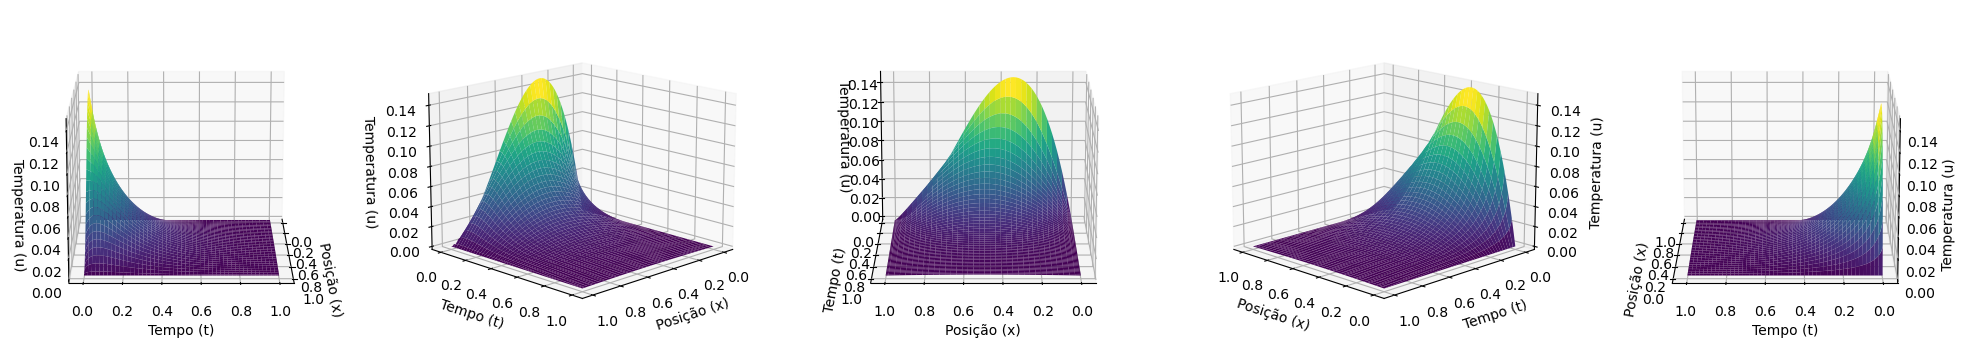

In [54]:
fig = plt.figure(figsize=(25,25), dpi=100)

ax = fig.add_subplot(151, projection='3d')

ax.plot_surface(X, T, m.T, cmap='viridis')
ax.set_xlabel('Posição (x)'), ax.set_ylabel('Tempo (t)'), ax.set_zlabel('Temperatura (u)')
ax.view_init(15,0)

ax = fig.add_subplot(152, projection='3d')

ax.plot_surface(X, T, m.T, cmap='viridis')
ax.set_xlabel('Posição (x)'), ax.set_ylabel('Tempo (t)'), ax.set_zlabel('Temperatura (u)')
ax.view_init(15,45)

ax = fig.add_subplot(153, projection='3d')

ax.plot_surface(X, T, m.T, cmap='viridis')
ax.set_xlabel('Posição (x)'), ax.set_ylabel('Tempo (t)'), ax.set_zlabel('Temperatura (u)')
ax.view_init(15,90)

ax = fig.add_subplot(154, projection='3d')

ax.plot_surface(X, T, m.T, cmap='viridis')
ax.set_xlabel('Posição (x)'), ax.set_ylabel('Tempo (t)'), ax.set_zlabel('Temperatura (u)')
ax.view_init(15,135)

ax = fig.add_subplot(155, projection='3d')

ax.plot_surface(X, T, m.T, cmap='viridis')
ax.set_xlabel('Posição (x)'), ax.set_ylabel('Tempo (t)'), ax.set_zlabel('Temperatura (u)')
ax.view_init(15,180)

plt.show()